In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#to visualise all the columns in the dataframe
pd.pandas.set_option('display.max_columns', None)

# 1. Data Cleaning and Preparation

### Loading dataset into datafram

In [2]:
df = pd.read_csv('Cardiotocographic.csv')
df.head()

,LB,AC,FM,UC,DL,DS,DP,ASTV,MSTV,ALTV,MLTV,Width,Tendency,NSP
0,120.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,73.0,0.5,43.0,2.4,64.0,0.999926,2.0
1,132.000000,0.006380,0.0,0.006380,0.003190,0.0,0.0,17.0,2.1,0.0,10.4,130.0,0.000000,1.0
2,133.000000,0.003322,0.0,0.008306,0.003322,0.0,0.0,16.0,2.1,0.0,13.4,130.0,0.000000,1.0
3,134.000000,0.002561,0.0,0.007742,0.002561,0.0,0.0,16.0,2.4,0.0,23.0,117.0,1.000000,1.0
4,131.948232,0.006515,0.0,0.008143,0.000000,0.0,0.0,16.0,2.4,0.0,19.9,117.0,1.000000,1.0


In [3]:
df.columns

Index(['LB', 'AC', 'FM', 'UC', 'DL', 'DS', 'DP', 'ASTV', 'MSTV', 'ALTV',
       'MLTV', 'Width', 'Tendency', 'NSP'],
      dtype='object')

In [4]:
len(df.columns)

14

### Handle missing values appropriately (e.g., imputation, deletion).

In [5]:
# To check how many columns have missing values
df.isnull().sum()

LB          21
AC          20
FM           0
UC           0
DL           0
DS          21
DP          21
ASTV         0
MSTV         0
ALTV         0
MLTV        21
Width       21
Tendency    21
NSP         21
dtype: int64

In [6]:
# Impute missing values with the mean of each column
df.fillna(df.mean(), inplace=True)
df.isnull().sum()

LB          0
AC          0
FM          0
UC          0
DL          0
DS          0
DP          0
ASTV        0
MSTV        0
ALTV        0
MLTV        0
Width       0
Tendency    0
NSP         0
dtype: int64

In [7]:
# Delete rows with any missing values
df.dropna(axis=0, inplace=True)
df.isnull().sum()

LB          0
AC          0
FM          0
UC          0
DL          0
DS          0
DP          0
ASTV        0
MSTV        0
ALTV        0
MLTV        0
Width       0
Tendency    0
NSP         0
dtype: int64

In [8]:
# Delete columns with any missing values
df.dropna(axis=1, inplace=True)
df.isnull().sum()

LB          0
AC          0
FM          0
UC          0
DL          0
DS          0
DP          0
ASTV        0
MSTV        0
ALTV        0
MLTV        0
Width       0
Tendency    0
NSP         0
dtype: int64

### Identify and correct any inconsistencies in data types (e.g., numerical values stored as strings).

In [9]:
for col in df.columns:
    if df[col].dtype == 'object':
        try:
            # Try converting the column to numeric
            df[col] = pd.to_numeric(df[col])
        except ValueError:
            # If conversion fails, handle the error (e.g., print a message)
            print(f"Cannot convert column '{col}' to numeric.")

# Display the updated DataFrame
df


,LB,AC,FM,UC,DL,DS,DP,ASTV,MSTV,ALTV,MLTV,Width,Tendency,NSP
0,120.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,73.0,0.5,43.000000,2.4,64.0,0.999926,2.000000
1,132.000000,0.006380,0.000000,0.006380,0.003190,0.0,0.0,17.0,2.1,0.000000,10.4,130.0,0.000000,1.000000
2,133.000000,0.003322,0.000000,0.008306,0.003322,0.0,0.0,16.0,2.1,0.000000,13.4,130.0,0.000000,1.000000
3,134.000000,0.002561,0.000000,0.007742,0.002561,0.0,0.0,16.0,2.4,0.000000,23.0,117.0,1.000000,1.000000
4,131.948232,0.006515,0.000000,0.008143,0.000000,0.0,0.0,16.0,2.4,0.000000,19.9,117.0,1.000000,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2121,140.000000,0.000000,0.961268,0.007426,0.000000,0.0,0.0,79.0,0.2,25.000000,7.2,40.0,0.000000,2.000000
2122,140.000000,0.000775,0.000000,0.006979,0.000000,0.0,0.0,78.0,0.4,22.000000,7.1,66.0,1.000000,2.000000
2123,140.000000,0.000980,0.000000,0.006863,0.000000,0.0,0.0,79.0,0.4,20.000000,6.1,67.0,1.000000,1.990464
2124,140.000000,0.000679,0.000000,0.006110,0.000000,0.0,0.0,78.0,0.4,27.000000,7.0,66.0,1.000000,2.000000


### Detect and treat outliers if necessary.

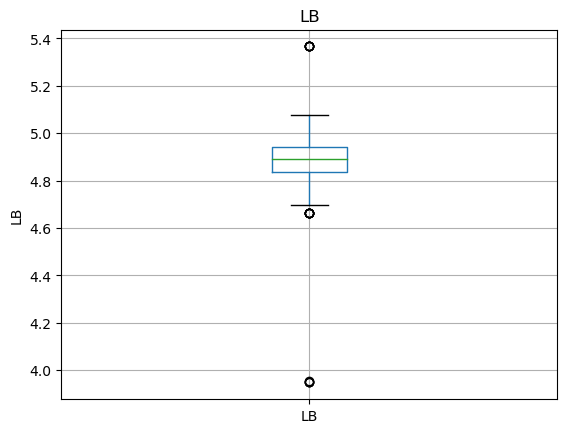

C:\Users\LENOVO\anaconda3\Lib\site-packages\pandas\core\arraylike.py:396: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


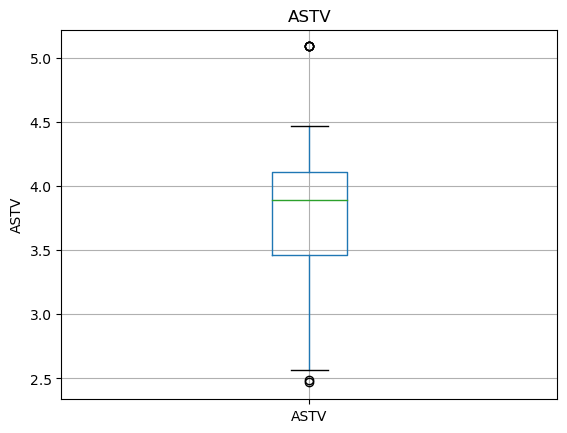

C:\Users\LENOVO\anaconda3\Lib\site-packages\pandas\core\arraylike.py:396: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


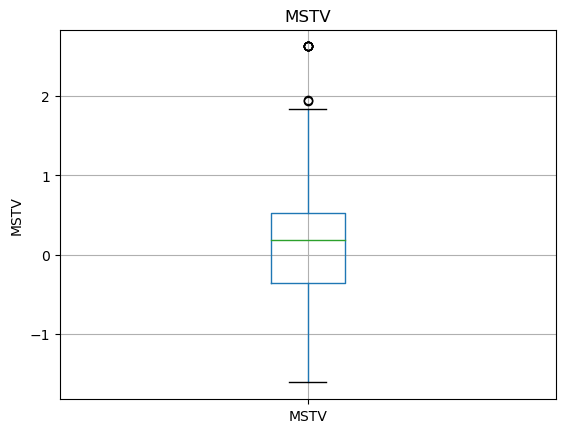

C:\Users\LENOVO\anaconda3\Lib\site-packages\pandas\core\arraylike.py:396: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


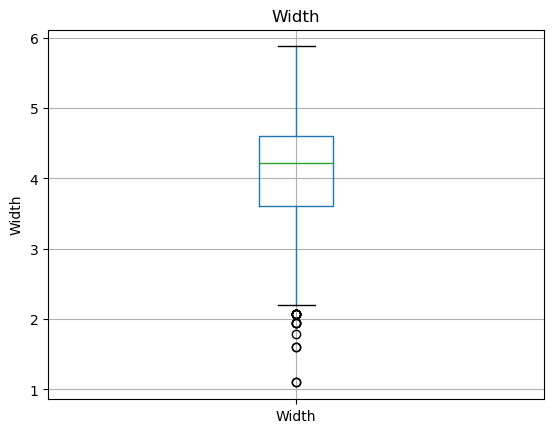

C:\Users\LENOVO\anaconda3\Lib\site-packages\pandas\core\arraylike.py:396: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


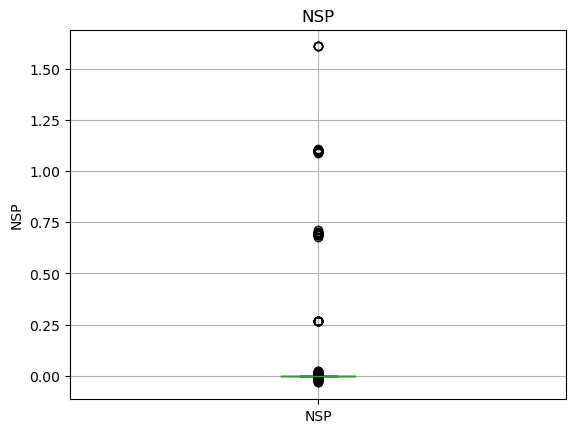

In [10]:
# Detecting outliers
for feature in df:
    data=df.copy()
    if 0 in data[feature].unique():
        pass
    else:
        data[feature] = np.log(data[feature])
        data.boxplot(column=feature)
        plt.ylabel(feature)
        plt.title(feature)
        plt.show()

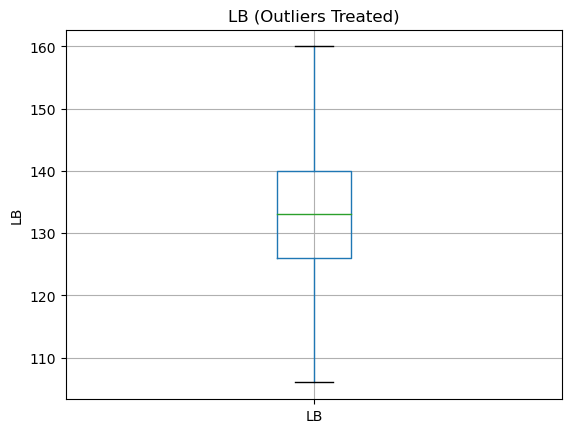

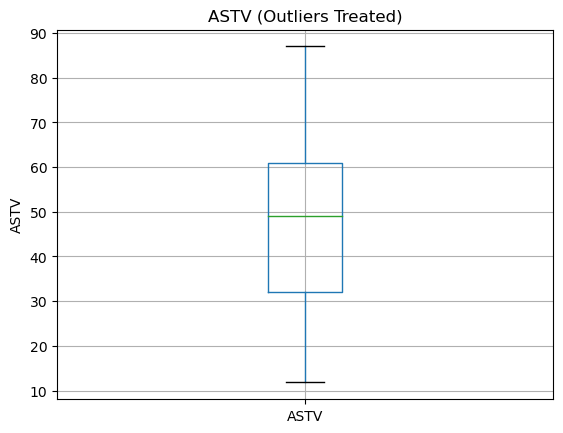

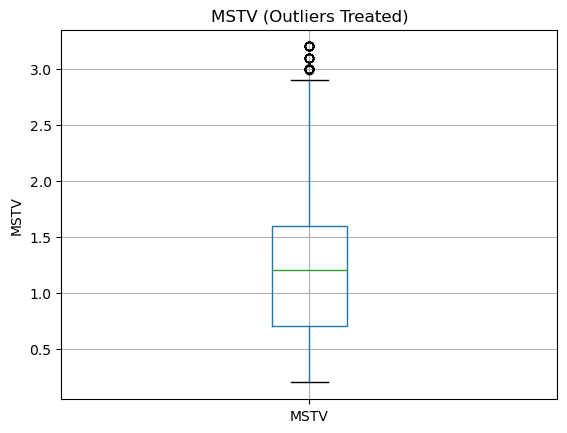

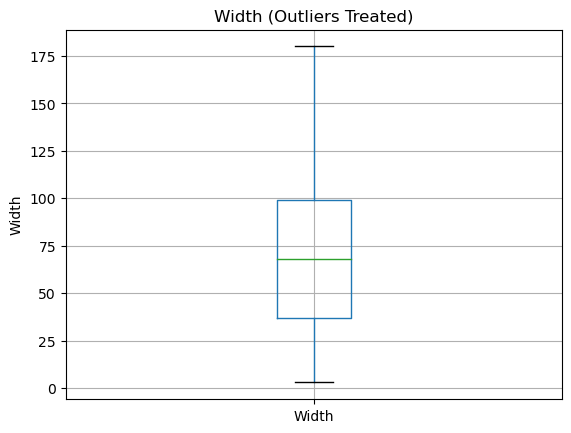

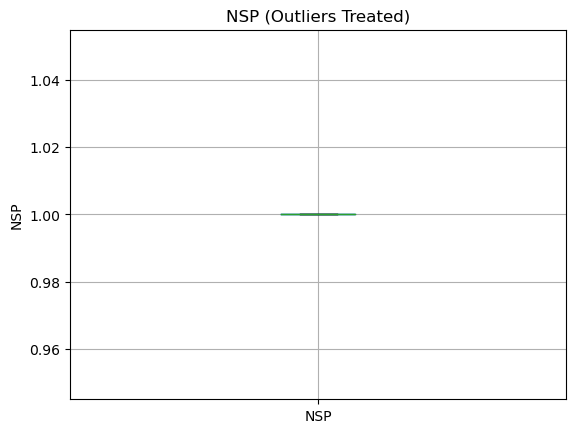

In [11]:
# Treating outliers

for feature in df.columns:
    data = df.copy()
    if 0 in data[feature].unique():
        pass
    else:
        # Treat outliers by replacing them with the median
        median = data[feature].median()
        q1 = data[feature].quantile(0.25)
        q3 = data[feature].quantile(0.75)
        iqr = q3 - q1
        lower_bound = q1 - 1.5 * iqr
        upper_bound = q3 + 1.5 * iqr
        data.loc[data[feature] < lower_bound, feature] = median
        data.loc[data[feature] > upper_bound, feature] = median
        
        # Display boxplot after treating outliers
        data.boxplot(column=feature)
        plt.ylabel(feature)
        plt.title(f"{feature} (Outliers Treated)")
        plt.show()

# 2. Statistical Summary

In [12]:
df.describe()

,LB,AC,FM,UC,DL,DS,DP,ASTV,MSTV,ALTV,MLTV,Width,Tendency,NSP
count,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000
mean,133.343598,0.003219,0.009894,0.004391,0.001895,0.000003,0.000175,46.995984,1.364378,10.285964,8.284887,70.429260,0.316371,1.304507
std,11.214328,0.004370,0.067540,0.003340,0.003343,0.000141,0.000836,18.813973,1.173632,21.205041,7.734356,42.719161,0.642424,0.641426
min,51.842487,-0.019284,-0.480634,-0.014925,-0.015393,-0.001353,-0.005348,-63.000000,-6.600000,-91.000000,-50.700000,-174.000000,-3.000000,-1.025988
25%,126.000000,0.000000,0.000000,0.001851,0.000000,0.000000,0.000000,32.000000,0.700000,0.000000,4.600000,37.000000,0.000000,1.000000
50%,133.000000,0.001668,0.000000,0.004484,0.000000,0.000000,0.000000,49.000000,1.200000,0.000000,7.500000,68.000000,0.000000,1.000000
75%,140.000000,0.005606,0.002567,0.006536,0.003289,0.000000,0.000000,61.000000,1.700000,11.000000,10.800000,100.000000,1.000000,1.000000
max,214.000000,0.038567,0.961268,0.030002,0.030769,0.002706,0.010695,162.000000,13.800000,182.000000,101.400000,357.000000,3.000000,5.000000


In [13]:
# Inter Quartile Range
for col in df.columns:
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    iqr = q3 - q1
    print(f"IQR for {col}: {round(iqr, 3)}")

IQR for LB: 14.0
IQR for AC: 0.006
IQR for FM: 0.003
IQR for UC: 0.005
IQR for DL: 0.003
IQR for DS: 0.0
IQR for DP: 0.0
IQR for ASTV: 29.0
IQR for MSTV: 1.0
IQR for ALTV: 11.0
IQR for MLTV: 6.2
IQR for Width: 63.0
IQR for Tendency: 1.0
IQR for NSP: 0.0


Here are some interesting findings from the dataset:

1. LB (Lower Bound): The mean value is 133.34, with an IQR of 14. This indicates that most of the values are clustered around the mean, with relatively few outliers.

2. AC (Acceleration): The mean is very close to zero (0.003), indicating that there is very little acceleration overall. The IQR is small (0.006), suggesting that there is not much variation in acceleration values.

3. FM (Fetal Movement): The IQR for FM is 0.003, indicating that there is some variation in fetal movement values. The maximum value is 0.961, which suggests that there are some extreme values in the dataset.

4. UC (Uterine Contraction): The IQR for UC is 0.005, indicating that there is some variation in uterine contraction values. The maximum value is 0.03, which suggests that there are some extreme values in the dataset.

5. DS (Decelerations): The IQR for DS is 0.0, indicating that there is no variation in deceleration values. This could be an interesting finding, as it suggests that most of the values are clustered around a single value.

6. DP (Periodic Decelerations): Similar to DS, the IQR for DP is 0.0, indicating no variation in periodic deceleration values.

7. ASTV (Percentage of Time with Abnormal Short Term Variability): The IQR for ASTV is 29.0, indicating some variation in abnormal short-term variability values.

8. MSTV (Mean Value of Short Term Variability): The IQR for MSTV is 1.0, indicating some variation in mean short-term variability values.

9. ALTV (Percentage of Time with Abnormal Long Term Variability): The IQR for ALTV is 11.0, indicating some variation in abnormal long-term variability values.

10. MLTV (Mean Value of Long Term Variability): The IQR for MLTV is 6.2, indicating some variation in mean long-term variability values.

11. Width: The IQR for Width is 63.0, indicating some variation in width values.

12. Tendency: The IQR for Tendency is 1.0, indicating some variation in tendency values.

13. NSP (Fetal State Class Code): The IQR for NSP is 0.0, indicating no variation in fetal state class code values.

These findings provide insights into the distribution and variation of the different variables in your dataset, which can help in further analysis and understanding of the data.

# 3. Data Visualization

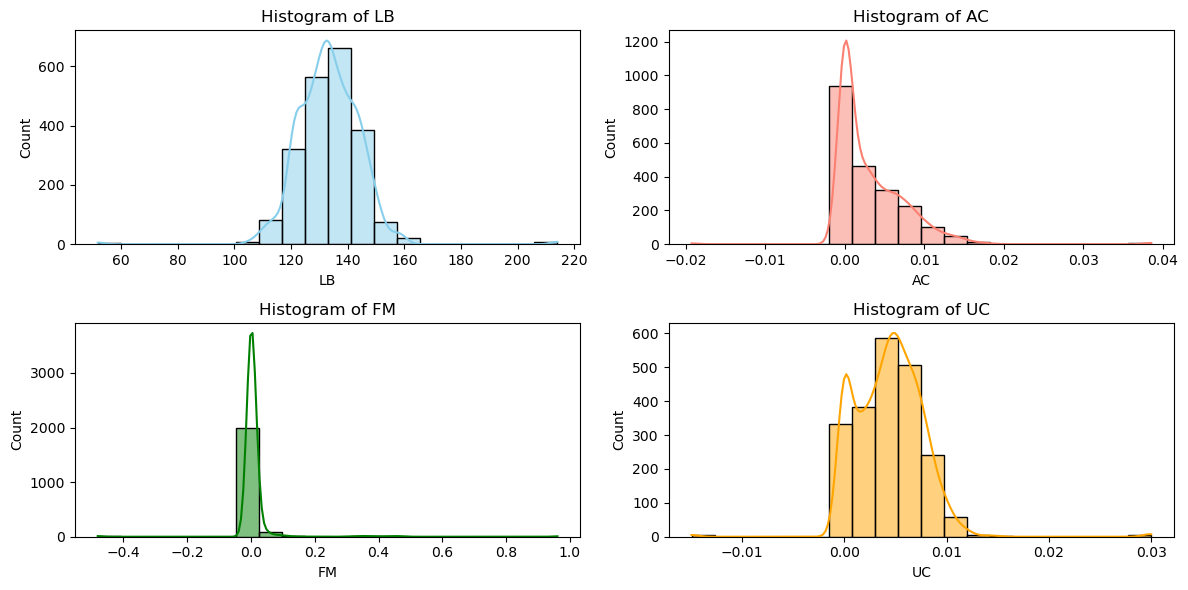

In [14]:
# Histograms
plt.figure(figsize=(12, 6))
plt.subplot(2, 2, 1)
sns.histplot(data=df, x='LB', bins=20, kde=True, color='skyblue')
plt.title('Histogram of LB')

plt.subplot(2, 2, 2)
sns.histplot(data=df, x='AC', bins=20, kde=True, color='salmon')
plt.title('Histogram of AC')

plt.subplot(2, 2, 3)
sns.histplot(data=df, x='FM', bins=20, kde=True, color='green')
plt.title('Histogram of FM')

plt.subplot(2, 2, 4)
sns.histplot(data=df, x='UC', bins=20, kde=True, color='orange')
plt.title('Histogram of UC')

plt.tight_layout()
plt.show()

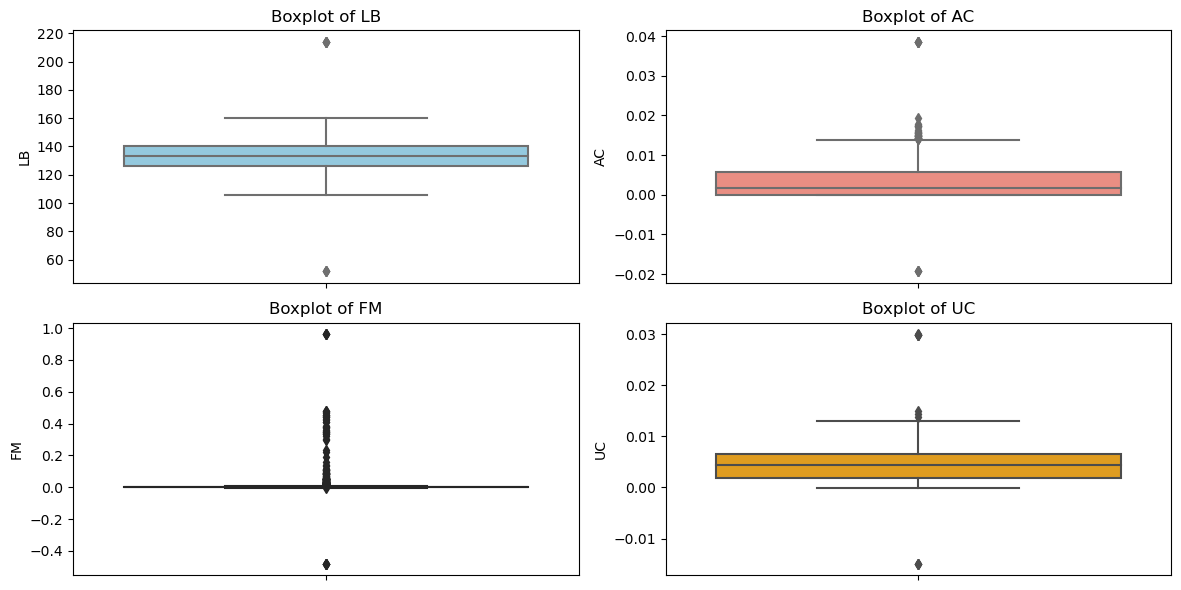

In [15]:
# Boxplots
plt.figure(figsize=(12, 6))
plt.subplot(2, 2, 1)
sns.boxplot(data=df, y='LB', color='skyblue')
plt.title('Boxplot of LB')

plt.subplot(2, 2, 2)
sns.boxplot(data=df, y='AC', color='salmon')
plt.title('Boxplot of AC')

plt.subplot(2, 2, 3)
sns.boxplot(data=df, y='FM', color='green')
plt.title('Boxplot of FM')

plt.subplot(2, 2, 4)
sns.boxplot(data=df, y='UC', color='orange')
plt.title('Boxplot of UC')

plt.tight_layout()
plt.show()


### Since there are no categorical variables to plot bar charts or pie charts

C:\Users\LENOVO\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


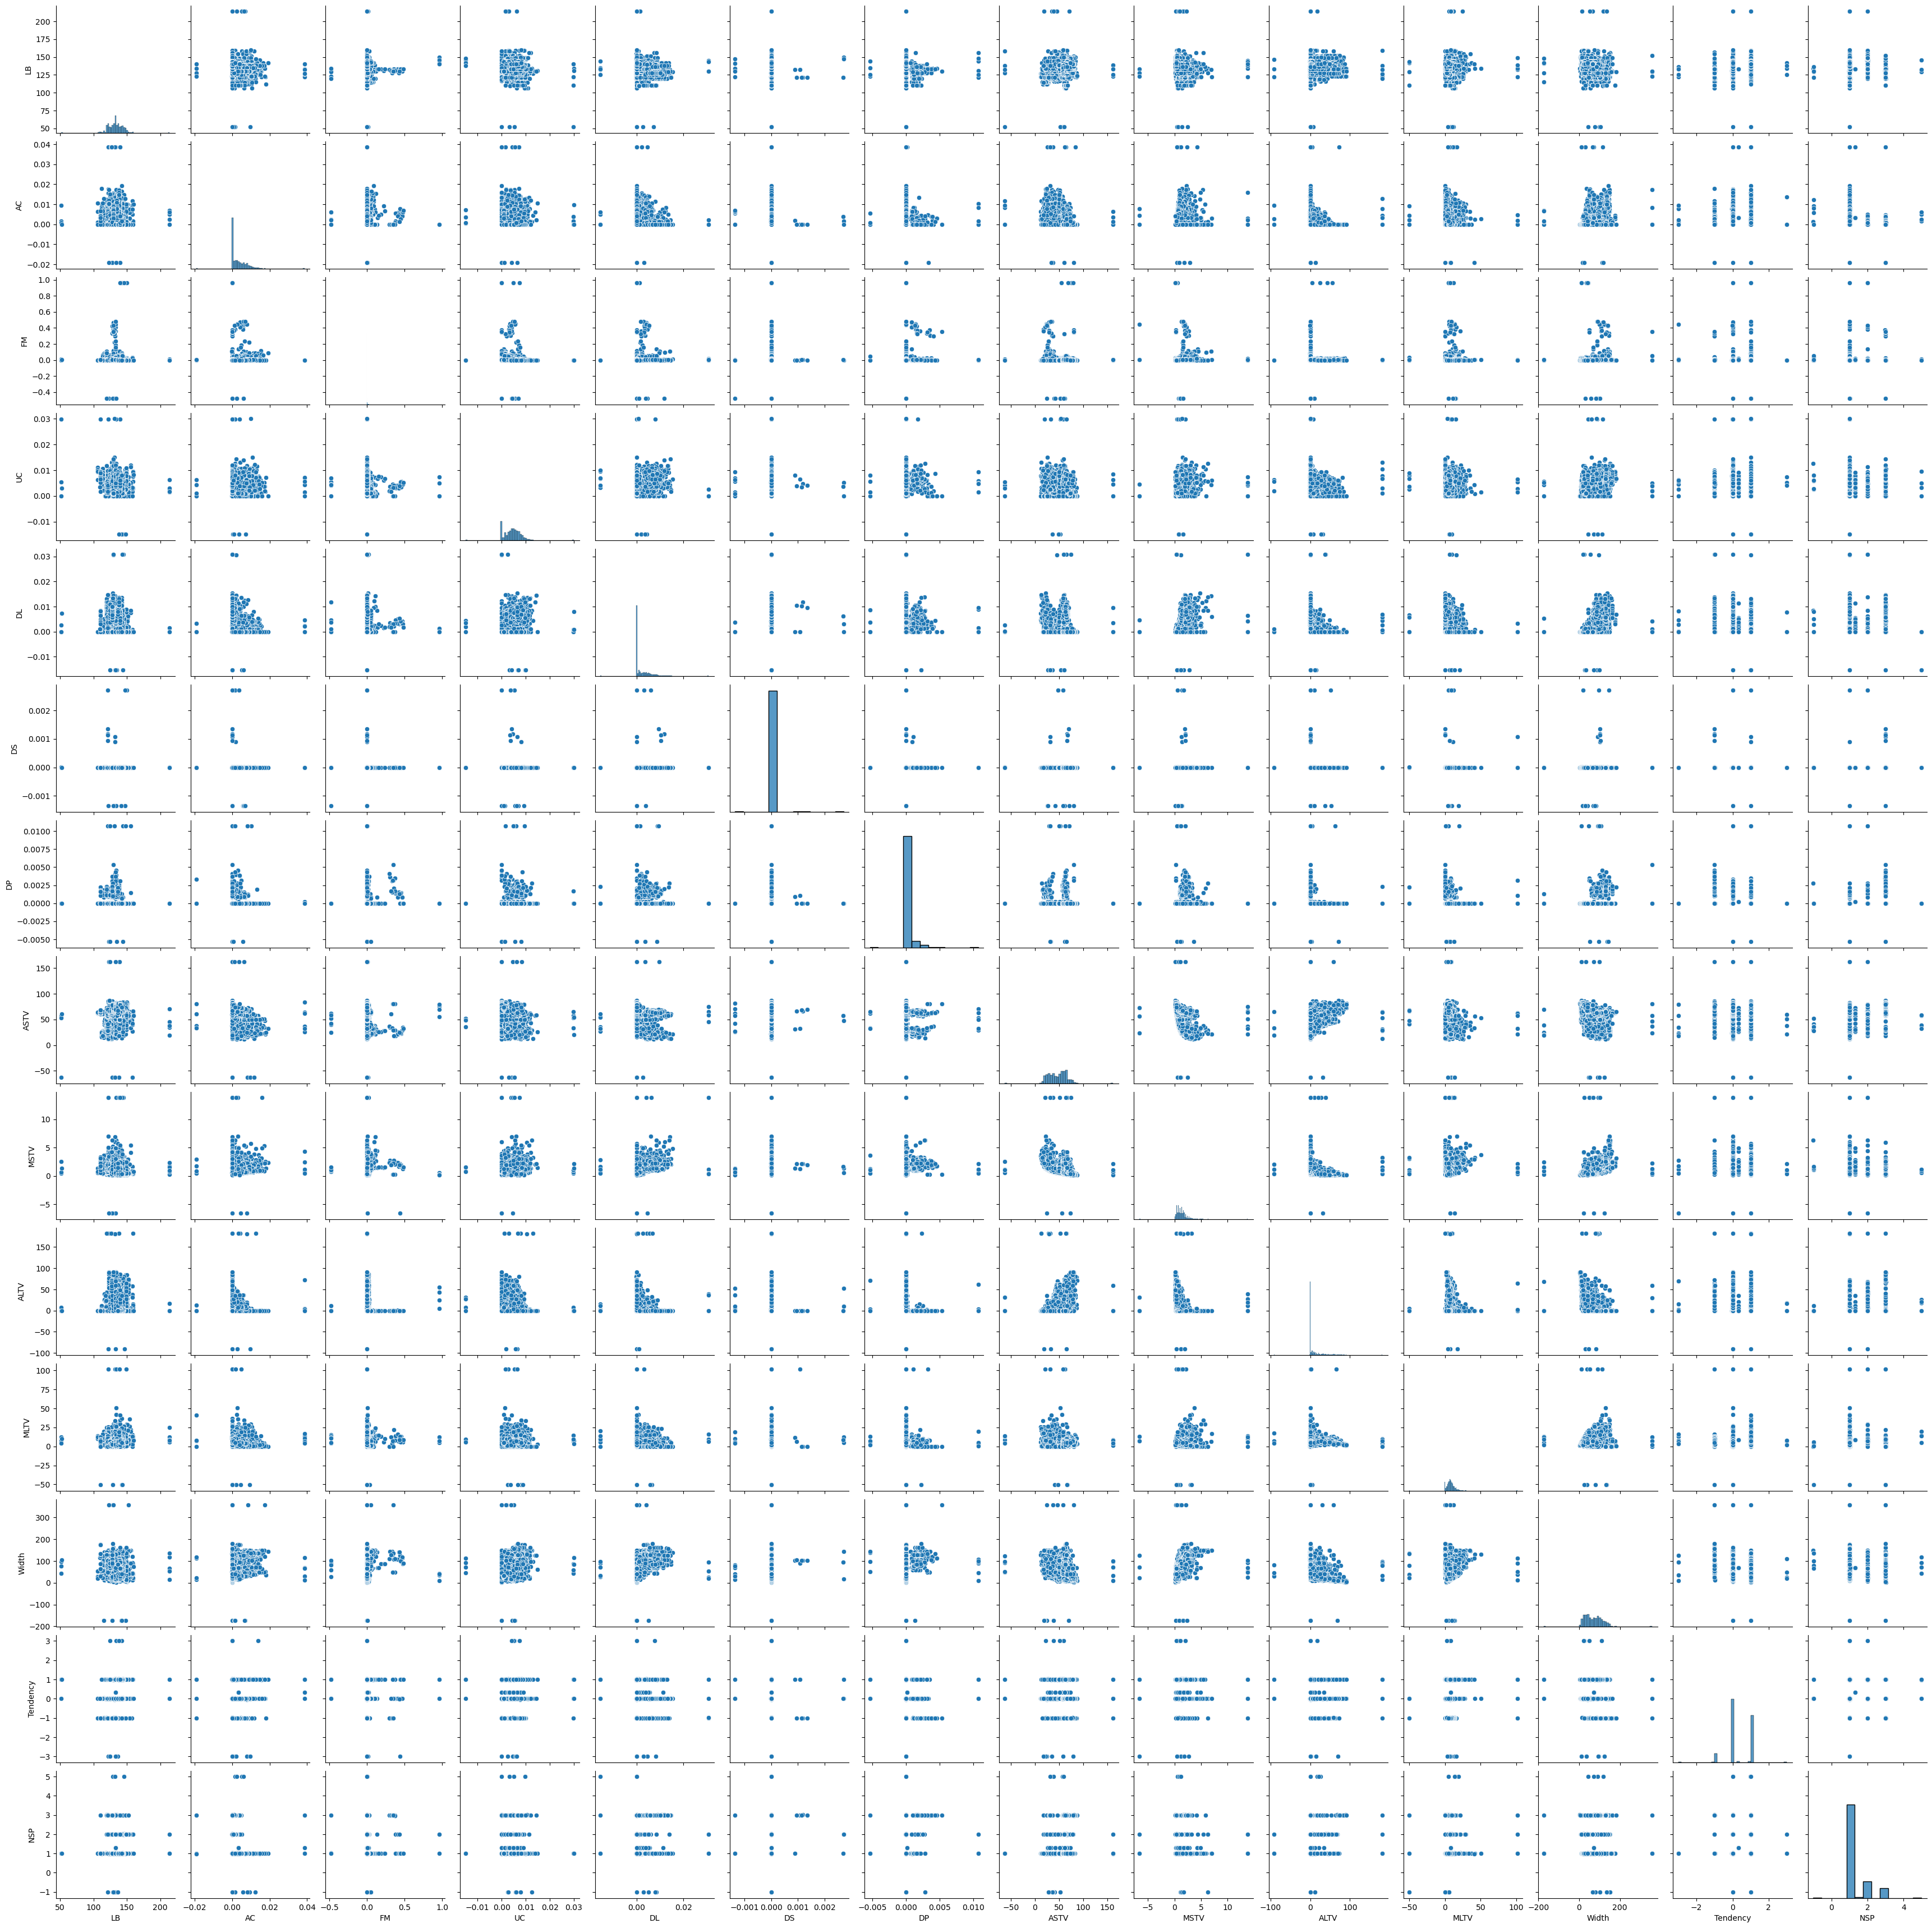

In [16]:
# Create scatter plots for all pairs of variables
sns.pairplot(df)
plt.show()

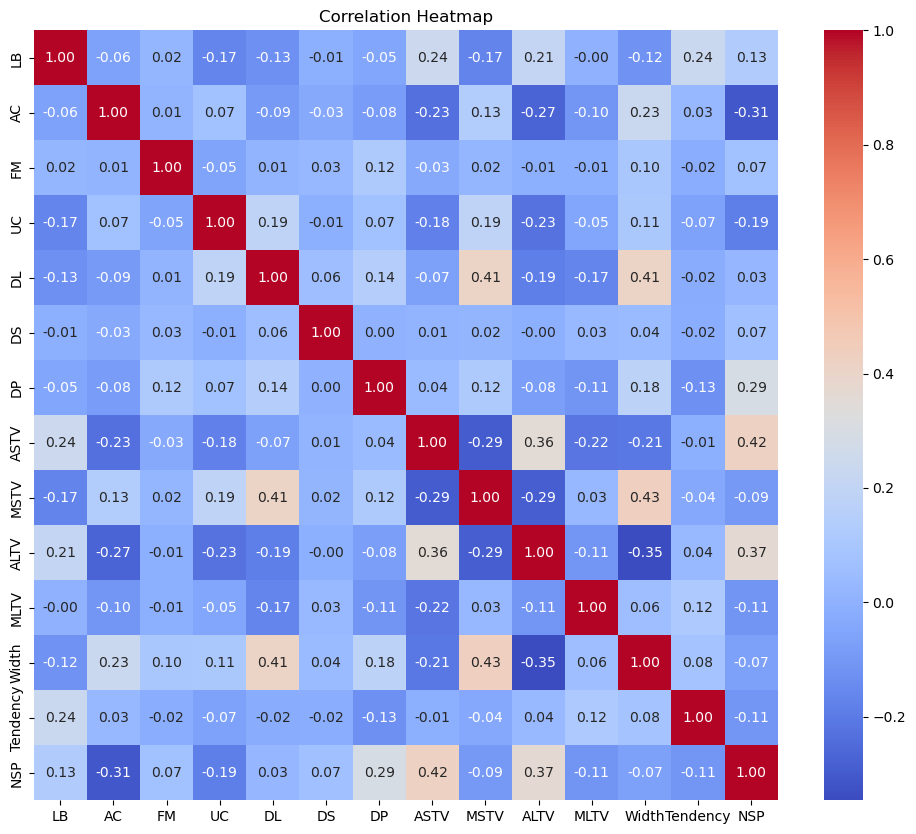

In [17]:
# Create correlation heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

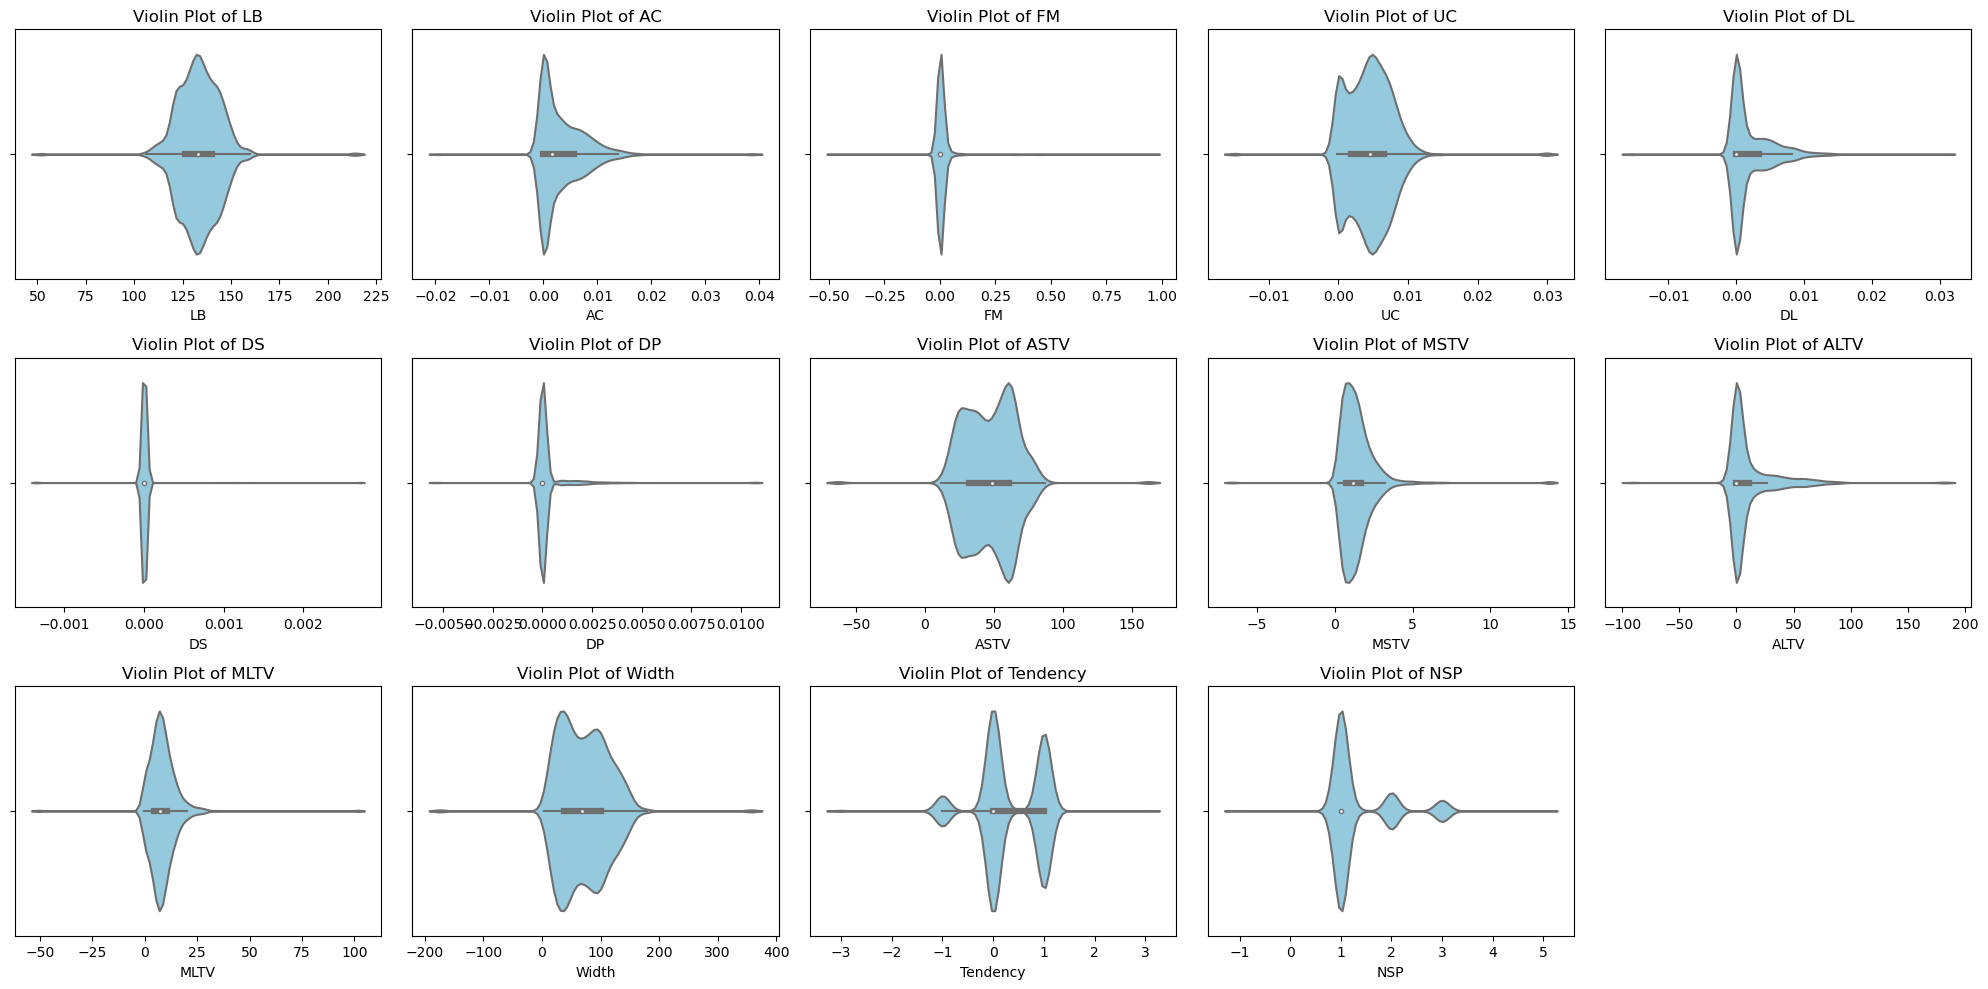

In [18]:
# Violin plots
plt.figure(figsize=(20, 10))
for i, col in enumerate(df.columns):
    if df[col].dtype != 'object':  # Check if the column is numerical
        plt.subplot(3, 5, i+1)
        sns.violinplot(x=df[col], color='skyblue')
        plt.title(f'Violin Plot of {col}')
plt.tight_layout()
plt.show()

# Insights and potential implications

Based on the correlation heatmap:
- LB (Baseline Fetal Heart Rate) shows a strong negative correlation with AC (Accelerations) and FM (Fetal Movements), 
  which might suggest that higher baseline heart rates are associated with fewer accelerations and movements.
- AC (Accelerations) has a positive correlation with FM (Fetal Movements), indicating that increased fetal movements 
  are associated with more accelerations in heart rate.
- UC (Uterine Contractions) shows a positive correlation with DL (Decelerations Late) and DP (Decelerations Prolonged),
  suggesting that increased contractions may lead to more instances of late and prolonged decelerations.
- There's a negative correlation between ASTV (Percentage of Time with Abnormal Short Term Variability) and MLTV 
  (Mean Value of Long Term Variability), implying that as short term variability increases, long term variability tends 
  to decrease, and vice versa.

These findings could impact decision-making in prenatal care and labor management. For example:
- Monitoring fetal movements and accelerations could be crucial indicators of fetal well-being.
- The relationship between uterine contractions and decelerations could inform decisions regarding labor induction 
  or cesarean section.
- Understanding variability in fetal heart rate over different time scales (short-term vs. long-term) could aid in 
  identifying potential risks during pregnancy.

If temporal data is available, trends or patterns over time can be analyzed to further understand how these variables 
change throughout the course of pregnancy and labor.